# **Proyek Analisis Data E-Commerce**

- **Nama: Fahmi Abdul Salaam Luhtari**
- **Email: fahmi3737@smk.belajar.id** 
- **Cohort ID: MS058D5Y0561** 

## **Menentukan Pertanyaan Bisnis**

1. **Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?**
2. **Bagaimana tingkat kepuasan pelanggan terhadap produk dalam beberapa bulan terakhir?**
3. **Bagaimana demografi pelanggan perusahaan, seperti usia, jenis kelamin, dan lokasi geografis?**

## **Install Semua Packages / Library Yang Akan Digunakan**

```bash
# Install dependency yang akan digunakan secara manual
pip install numpy pandas matplotlib seaborn scipy streamlit

# Install dependency yang akan digunakan melalui requirements.txt
pip install -r requirements.txt

## **Import Dependency Yang Akan Digunakan**


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtc
import seaborn as sns

## **Data Wrangling**

Pada tahap ini kita akan melakukan beberapa langkah, yaitu:
1. **Mengumpulkan Data (Gathering Data)**
2. **Menilai Data (Assessing Data)**
3. **Membersihkan Data (Cleaning Data)**

### **1. Gathering Data**
Pada tahap ini kita akan mengumpulkan data yang diperlukan untuk proyek analisis data. Pada proyek kali ini data yang saya gunakan adalah data E-Commerce, yang memiliki total 9 dataset berformat CSV. Kode dibawah ini akan memuat dataset tersebut ke dalam dataframe pandas.

In [34]:
# Customers DataFrame
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [35]:
# Geolocation DataFrame
geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [36]:
# Order Items DataFrame
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [37]:
# Order Payments DataFrame
order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [38]:
# Order Reviews DataFrame
order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [39]:
# Orders DataFrame
orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [40]:
# Product Category Name Translation Dataframe
product_category_name_translation_df = pd.read_csv("./data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [41]:
# Products DataFrame
products_df = pd.read_csv("./data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [42]:
# Sellers DataFrame
sellers_df = pd.read_csv("./data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Pada langkah ini dapat diketahui bahwa Data E-Commerce ini adalah data yang menggunakan Bahasa Latin / Brazil, bisa dilihat dari dataset **geolocation_dataset** terdapat nama kota yang menggunakan Bahasa Latin / Brazil seperti **São Paulo**, **Rio de Janeiro**, dll.

### **2. Assessing Data**
Pada tahap ini kita akan melakukan penilaian terhadap data yang telah dikumpulkan. Penilaian ini bertujuan untuk mengetahui apakah data yang dikumpulkan sudah sesuai dengan kebutuhan analisis data. Ada beberapa langkah yang bisa dilakukan, seperti:
- Melihat informasi dasar dataset.
- Mengecek apakah ada missing value atau tidak.
- Melihat statistik deskriptif dataset.
- Mengecek apakah ada duplikasi data tau tidak.

In [43]:
# Customers DataFrame

customers_df.info()
print("Jumlah duplikasi data: ", customers_df.duplicated().sum())
customers_df.describe(include='all')

# Aman

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi data:  0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [44]:
# Geolocation DataFrame

geolocation_df.info()
print("Jumlah duplikasi data: ", geolocation_df.duplicated().sum())
print(geolocation_df[geolocation_df.duplicated()])
geolocation_df.describe(include='all')

# Aman


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah duplikasi data:  261831
         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
15                              1046       -23.546081       -46.644820   
44                              1046       -23.546081       -46.644820   
65                              1046       -23.546081       -46.644820   
66                              1009       -23.546935       -46.636588   
67  

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [45]:
# Order Items DataFrame

order_items_df.info()
print("Jumlah duplikasi data: ", order_items_df.duplicated().sum())
order_items_df.describe(include='all')

# Perlu perubahan terhadap tipe data kolom shipping_limit_date, dari object menjadi datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi data:  0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [46]:
# Order Payments DataFrame

order_payments_df.info()
print("Jumlah duplikasi data: ", order_payments_df.duplicated().sum())
order_payments_df.describe(include='all')

# Aman

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi data:  0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [47]:
# Order Reviews DataFrame

order_reviews_df.info()
print("Jumlah duplikasi data: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe(include='all')

# Perlu perubahan terhadap tipe data kolom review_creation_date & reveiw_answer_timestamp, dari object menjadi datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi data:  0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [48]:
# Orders DataFrame

orders_df.info()
print("Jumlah duplikasi data: ", orders_df.duplicated().sum())
orders_df.describe(include='all')

# Perlu perubahan terhadap tipe data kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, dari object menjadi datetime
# Menghapus 1 data yang tidak valid karena statusnya delivered tetapi tidak memiliki tanggal pengiriman dan tanggal penerimaan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi data:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [49]:
# Product Category Name Translation

product_category_name_translation_df.info()
print("Jumlah duplikasi data: ", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe(include='all')

# Aman

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi data:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [50]:
# Product DataFrame

products_df.info()
print("Jumlah duplikasi data: ", products_df.duplicated().sum())
products_df.describe(include='all')

# Menangani missing value
# Mengecek outlier
# Menyesuaikan tipe data agar lebih sesuai

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi data:  0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [51]:
# Sellers DataFrame

sellers_df.info()
print("Jumlah duplikasi data: ", sellers_df.duplicated().sum())
sellers_df.describe(include='all')

# Aman

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah duplikasi data:  0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Insight:**
- Customer DataFrame: Aman
- Geolocation DataFrame: Aman
- Order Items DataFrame: 
    - Perlu perubahan terhadap tipe data kolom shipping_limit_date, dari object menjadi datetime
- Order Payments DataFrame: Aman
- Order Reviews DataFrame: 
    - Perlu perubahan terhadap tipe data kolom review_creation_date & reveiw_answer_timestamp, dari object menjadi datetime
- Order DataFrame: 
    - Perlu perubahan terhadap tipe data kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, dari object menjadi datetime
    - Menghapus 1 data yang tidak valid karena statusnya delivered tetapi tidak memiliki tanggal pengiriman dan tanggal penerimaan
- Product Category Name Translation DataFrame: Aman
- Product DataFrame: 
    - Menangani missing value
    - Menyesuaikan tipe data agar lebih sesuai
- Sellers DataFrame: Aman

### **3. Cleaning Data**
Pada tahap ini, kita akan melakukan pembersihan data untuk memastikan kualitas data sebelum melakukan analisis lebih lanjut. Ada beberapa langkah yang bisa dilakukan, seperti:
- Menangani missing value.
- Merubah tipe data kolom agar lebih sesuai.

In [52]:
# Order Items DataFrame

order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [53]:
# Order Reviews DataFrame

order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [54]:
# Orders DataFrame

orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"]) 
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

orders_df = orders_df.drop(orders_df[(orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_customer_date'].isna())].index)
print(orders_df['order_status'].value_counts())

orders_df.info()

order_status
delivered      96470
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 99433 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99433 non-null  object        
 1   customer_id                    99433 non-null  object        
 2   order_status                   99433 non-null  object        
 3   order_purchase_timestamp       99433 non-null  datetime64[ns]
 4   order_approved_at              99273 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97651 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99433 non-null  datetime64[ns]
dtypes: datetime64[n

In [55]:
# Product DataFrame

products_df['product_category_name'].fillna('unknows', inplace=True)
num_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in num_cols:
    products_df[col].fillna(products_df[col].median(), inplace=True)

print(products_df.isna().sum())

cols_to_int = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
for col in cols_to_int:
    products_df[col] = products_df[col].astype('int64')
    
print(products_df.dtypes)

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
product_id                     object
product_category_name          object
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


E:\Temp\ipykernel_18816\1447006242.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna('unknows', inplace=True)
E:\Temp\ipykernel_18816\1447006242.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

**Insight:**
- Order Items DataFrame: 
    - Perubahan terhadap tipe data kolom shipping_limit_date, yang awalnya bertipe object menjadi datetime, hal ini perlu dilakukan supaya data tetap baik dan konsisten
- Order Reviews DataFrame: 
    - Perubahan terhadap tipe data kolom review_creation_date & reveiw_answer_timestamp, yang awalnya bertipe object menjadi datetime, hal ini perlu dilakukan supaya data tetap baik dan konsisten
- Order DataFrame: 
    - Perubahan terhadap tipe data kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, dari object menjadi datetime
    - Menghapus 1 data yang tidak valid karena statusnya delivered tetapi tidak memiliki tanggal pengiriman dan tanggal penerimaan
- Product DataFrame: 
    - Menangani missing value dengan cara: 
        - mengisi missing value menggunakan median agar data tetap realistis
        - mengisi missing value pada product_category_name dengan unknown
    - Menyesuaikan tipe data agar data lebih sesuai dan konsisten

## **Exploratory Data Analysis (EDA)**

Pada tahap ini kita akan melakukan Exploratory Data Analysis (EDA) untuk menggali lebih dalam pola, tren, dan hubungan antar variabel dalam dataset E-Commerce. Pada tahap EDA, kita akan fokus untuk menjawab tiga pertanyaan bisnis yang telah ditentukan:
1. **Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?**
2. **Bagaimana tingkat kepuasan pelanggan terhadap produk dan layanan dalam beberapa bulan terakhir?**
3. **Bagaimana demografi pelanggan perusahaan, seperti lokasi state dan lokasi kota?**

Untuk masing-masing pertanyaan, kita akan melakukan analisis terperinci menggunakan visualisasi data dan statistik deskriptif.

### **1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?**
**Tujuan:**<br>
Menganalisis tren jumlah pesanan dan pendapatan dalam beberapa bulan terakhir

**Langkah Analisis:**<br>
- Agregasi jumlah pesanan dan total revenue per bulan
- Visualisasi tren penjualan dan revenue
- Identifikasi bulan dengan performa terbaik dan terburuk

In [56]:
orders_delivered = orders_df[orders_df['order_status'] == 'delivered']

orders_delivered['order_month'] = orders_delivered['order_purchase_timestamp'].dt.to_period('M')

sales_per_month = orders_delivered.groupby('order_month').size().reset_index(name='total_orders')
print(sales_per_month)

revenue_df = orders_delivered.merge(order_payments_df, on='order_id', how='left')

revenue_per_month = revenue_df.groupby('order_month')['payment_value'].sum().reset_index()
print(revenue_per_month)

   order_month  total_orders
0      2016-09             1
1      2016-10           265
2      2016-12             1
3      2017-01           750
4      2017-02          1653
5      2017-03          2546
6      2017-04          2303
7      2017-05          3545
8      2017-06          3135
9      2017-07          3872
10     2017-08          4193
11     2017-09          4150
12     2017-10          4478
13     2017-11          7288
14     2017-12          5513
15     2018-01          7069
16     2018-02          6555
17     2018-03          7003
18     2018-04          6798
19     2018-05          6749
20     2018-06          6096
21     2018-07          6156
22     2018-08          6351


E:\Temp\ipykernel_18816\2637060403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_delivered['order_month'] = orders_delivered['order_purchase_timestamp'].dt.to_period('M')


   order_month  payment_value
0      2016-09           0.00
1      2016-10       46566.71
2      2016-12          19.62
3      2017-01      127545.67
4      2017-02      271298.65
5      2017-03      414369.39
6      2017-04      390952.18
7      2017-05      566872.73
8      2017-06      490225.60
9      2017-07      566403.93
10     2017-08      646000.61
11     2017-09      701169.99
12     2017-10      751140.27
13     2017-11     1153393.22
14     2017-12      843199.17
15     2018-01     1078606.86
16     2018-02      966510.88
17     2018-03     1120678.00
18     2018-04     1132933.95
19     2018-05     1128836.69
20     2018-06     1011561.35
21     2018-07     1027383.10
22     2018-08      985414.28


In [57]:
product_sales = order_items_df.groupby('product_id')['order_id'].count().reset_index()
product_sales = product_sales.rename(columns={'order_id': 'total_sold'})
product_sales = product_sales.sort_values(by='total_sold', ascending=False)

most_sold_product = product_sales.iloc[0]

product_sales = product_sales.merge(products_df[['product_id', 'product_category_name']], on='product_id', how='left')

product_sales = product_sales.merge(product_category_name_translation_df, on='product_category_name', how='left')
print(product_sales)


                             product_id  total_sold  \
0      aca2eb7d00ea1a7b8ebd4e68314663af         527   
1      99a4788cb24856965c36a24e339b6058         488   
2      422879e10f46682990de24d770e7f83d         484   
3      389d119b48cf3043d311335e499d9c6b         392   
4      368c6c730842d78016ad823897a372db         388   
...                                 ...         ...   
32946  ffd7628b0b0b98ebc549e8e4c54a59af           1   
32947  ffd63ee42a5c8cc5a15a1c8e2aa50011           1   
32948  002959d7a0b0990fe2d69988affcbc80           1   
32949  002552c0663708129c0019cc97552d7d           1   
32950  0021a87d4997a48b6cef1665602be0f5           1   

           product_category_name product_category_name_english  
0               moveis_decoracao               furniture_decor  
1                cama_mesa_banho                bed_bath_table  
2             ferramentas_jardim                  garden_tools  
3             ferramentas_jardim                  garden_tools  
4             

**Insight:**<br>
Bisa dilihat pada line chart yang dihasilkan di atas, bahwa jumlah penjualan semakin naik seiring berjalannya waktu, meskipun pada beberapa waktu mengalami penurunan yang tidak terlalu signifikan kemudian menjadi stabil kembali. Jumlah Pembelian terbanyak terjadi pada bulan November 2017. Begitu pula dengan jumlah pendapatan terbanyak terjadi pada bulan November 2017. Serta kategori product yang paling banyak terjual adalah kategori Furniture Decor.

### **2. Bagaimana tingkat kepuasan pelanggan terhadap produk dalam beberapa bulan terakhir?**
**Tujuan:**<br>
Menilai kepuasan pelanggan berdasarkan rating review produk

**Langkah Analisis:**<br>
- Analisis rata-rata review_score per bulan
- Distribusi skor review (berapa banyak bintang 1, 2, 3, dst.)
- Cek korelasi antara review_score dan keterlambatan pengiriman (apakah keterlambatan memengaruhi rating?)
- Visualisasi tren kepuasan pelanggan

In [58]:
order_reviews_df.info()

review_distribution = order_reviews_df['review_score'].value_counts().sort_index()
print(review_distribution)

print(order_reviews_df['review_creation_date'].min(), order_reviews_df['review_creation_date'].max())

order_reviews_df['review_month'] = order_reviews_df['review_creation_date'].dt.to_period('M')

avg_rating_per_month = order_reviews_df.groupby('review_month')['review_score'].mean().reset_index()
print(avg_rating_per_month.head())

order_reviews_df[order_reviews_df['review_score'] == 1]['review_comment_message'].dropna().sample(50)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64
2016-10-02 00:00:00 2018-08-31 00:00:00
  review_month  review_score
0      2016-10      4.055866
1      2016-11      3.188119
2      2016-12      2.355556
3      2017-01      4.33

93160    A carteira é linda, porém é muito grande e for...
92563    Não foi o sabor que fiz o pedido \r\nFiz pedid...
90185    O produto veio com as peças trocadas e não con...
33626    Pedi uma coisa e recebi outra!!!\r\nUm absurdo...
6768     Um absurdo um cliente se sujeitar a um prazo d...
10484      Bom dia!!! Ainda não recebi a minha encomenda! 
67136    Comprei um módulo de controle para LEDs e rece...
12370       não recebi o produto, não tenho o que avaliar.
29493    Comprei 5 itens, me chega 1 item que nem rastr...
77112    GOSTARIA DE SOLICITAR A ENTREGA DO PRODUTO NOV...
73827    Recebi apenas 3 fitas de 10 compradas na encom...
90720    Infelizmente n fiquei feliz passou o prazo ain...
57614    passado o prazo não recebi o produto e nem mes...
13733    O produto foi entregue na casa de um vizinho q...
13771                Ainda não chegou! Estou insatisfeita.
78883    Comprei esse produto que se dizia ter em estoq...
43391    Loja excelente, mas o produto é nota ZERO. Nem.

**Insight:**<br>
Bisa dilihat pada bar chart yang dihasilkan di atas, mayoritas pelanggan memberikan rating yang memuaskan. Ini menunjukkan bahwa produk atau layanan yang ditawarkan sudah cukup baik dan memuaskan kebanyakan pelanggan. Berdasarkan grafik rata-rata rating per bulan, menunjukkan bahwa rata-rata rating selama kurang lebih 1 tahun stabil di sekitar 4,5. Namun, perlu diperhatikan bahwa ada beberapa pelanggan yang memberikan rating kurang memuaskan, yaitu sekitar 15.000 orang, sehingga sangat perlu diperhatikan untuk meningkatkan kualitas produk atau layanan.

### **3. Bagaimana demografi pelanggan perusahaan, seperti lokasi state dan lokasi kota?**
**Tujuan:**<br>
Menilai kepuasan pelanggan berdasarkan rating review produk

**Langkah Analisis:**<br>
- Analisis persebaran lokasi pelanggan berdasarkan state dan city
- Visualisasi dalam bentuk bar chart / pie chart

In [59]:
customer_per_state = customers_df['customer_state'].value_counts()
print(customer_per_state)

customer_per_city = customers_df['customer_city'].value_counts().head(10)
print(customer_per_city)

revenue_per_state = orders_df.merge(order_payments_df, on='order_id').merge(customers_df, on='customer_id') \
    .groupby('customer_state')['payment_value'].sum().sort_values(ascending=False)

print(revenue_per_state)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64
customer_state
SP    5997042.04
RJ    2144379.69
MG    1872257.26
RS     890704.54
PR     811156.38
SC     623086.43
BA     616645.82
DF     355141.08
GO     350092.31
ES     325967.55
PE     324850.44
CE     279464.03
PA     218295.85
MT     187029.29
MA     152523.02
PB     141545.7

**Insight:**<br>
Bisa dilihat pada bar chart yang dihasilkan di atas, bahwa state dan kota yang memiliki jumlah pelanggan paling banyak beturut-turut adalah State of Sao Paulo (SP) dan kota Sao Paulo. Dengan hal ini pendapatan terbanyak berasal dari State of Sao Paulo (SP), khususnya kota Sao Paulo.

## **Data Visualization & Explanatory Analysis**

Pada tahap ini kita akan menyajikan visualisasi yang lebih mendalam serta menganalisis temuan utama dari tahap EDA. Analisis ini bertujuan untuk Menampilkan hasil analisis dengan visualisasi yang mudah dipahami, supaya audeiens atau stakeholder(pemangku kepentingan) dapat memahami insight yang ditemukan.

### **1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?**

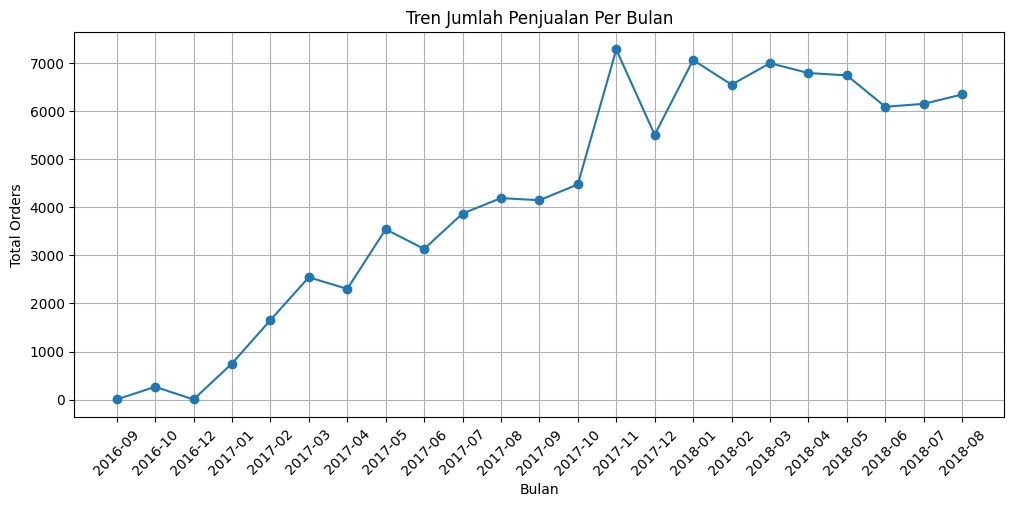

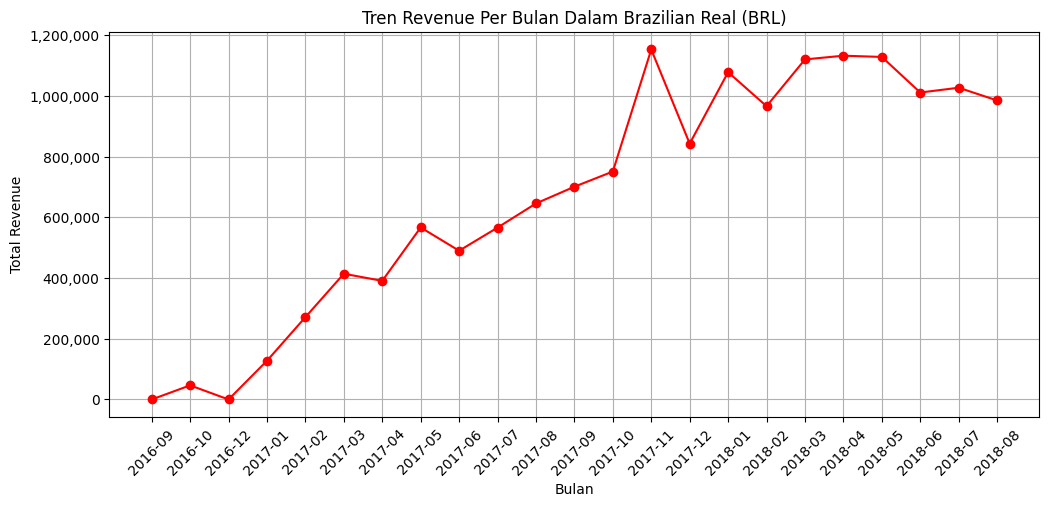

E:\Temp\ipykernel_18816\1036283069.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sold', y='product_category_name_english', data=product_sales.head(10), palette='Blues_r')


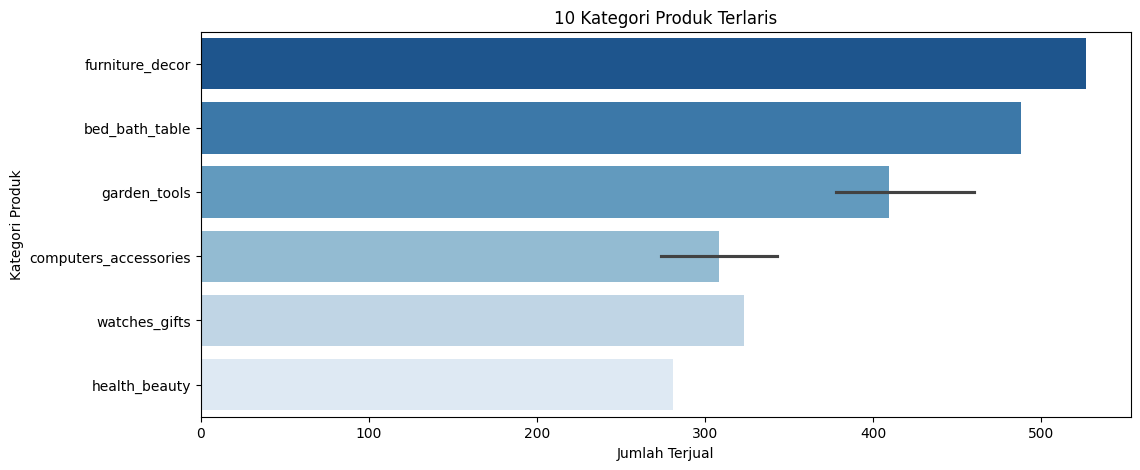

In [60]:
plt.figure(figsize=(12,5))
plt.plot(sales_per_month['order_month'].astype(str), sales_per_month['total_orders'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Tren Jumlah Penjualan Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Orders')
plt.grid()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(sales_per_month['order_month'].astype(str), revenue_per_month['payment_value'], marker='o', linestyle='-', color='red')
plt.xticks(rotation=45)
plt.title('Tren Revenue Per Bulan Dalam Brazilian Real (BRL)')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.grid()
plt.gca().yaxis.set_major_formatter(mtc.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='total_sold', y='product_category_name_english', data=product_sales.head(10), palette='Blues_r')
plt.xlabel("Jumlah Terjual")
plt.ylabel("Kategori Produk")
plt.title("10 Kategori Produk Terlaris")
plt.show()

**Insight:**<br>
- Jumlah penjualan terbanyak adalah pada bulan November 2017, dengan 7288 penjualan. Ini menunjukkan bahwa beberapa produk sangat populer di bulan tersebut
- Jumlah penjualan terendah adalah pada bulan September dan Desember 2016, dengan hanya 1 penjualan.
- Jumlah pendapatan terbanyak tentunya adalah pada bulan November 2017, dengan total 1.153.393.22 BRL pada bulan tersebut
- Kategori produk yang paling banyak terjual adalah furniture decor

### **2. Bagaimana tingkat kepuasan pelanggan terhadap produk dan layanan dalam beberapa bulan terakhir?**

E:\Temp\ipykernel_18816\566329905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_distribution.index, y=review_distribution.values, palette='coolwarm')


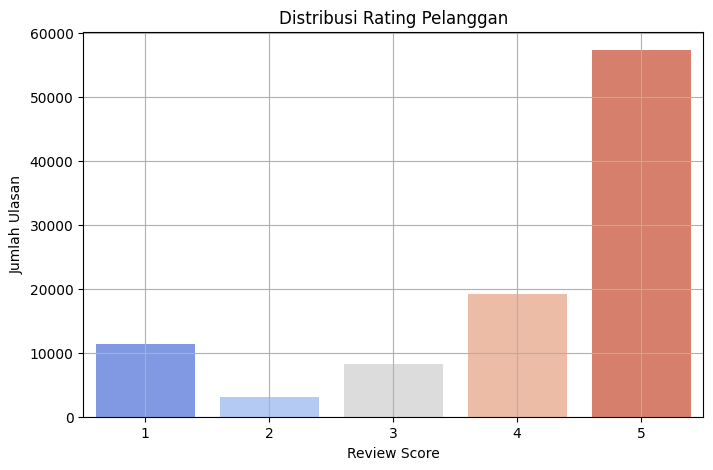

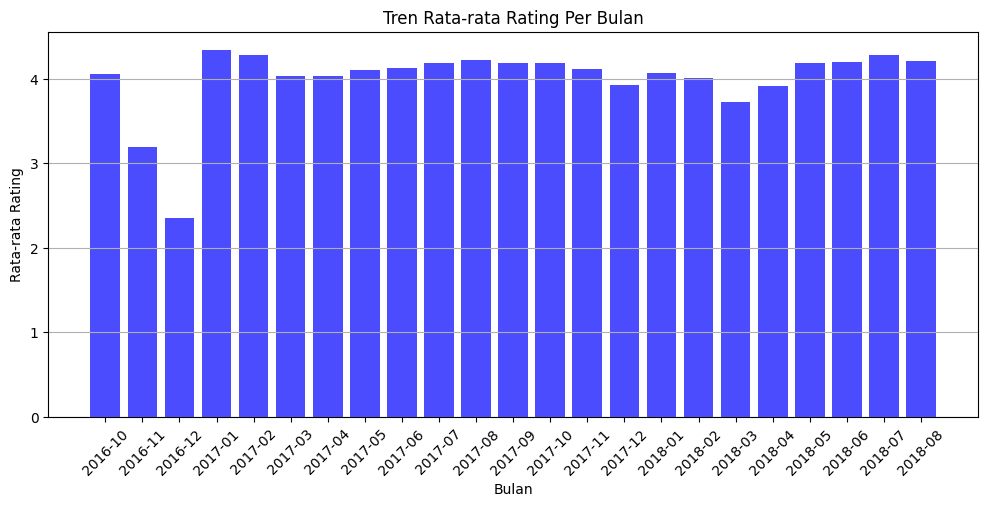

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(x=review_distribution.index, y=review_distribution.values, palette='coolwarm')
plt.xlabel('Review Score')
plt.ylabel('Jumlah Ulasan')
plt.title('Distribusi Rating Pelanggan')
plt.grid()
plt.show()

plt.figure(figsize=(12,5))
plt.bar(avg_rating_per_month['review_month'].astype(str), avg_rating_per_month['review_score'], color='blue', alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Rating')
plt.title('Tren Rata-rata Rating Per Bulan')
plt.grid(axis='y')
plt.show()

**Insight:**<br>
- Sebanyak 57328 pengguna memberikan rating yang sempurna (5)
- Rata-rata penilaian selama kurang lebih 1 tahun stabil berada di angka sekitar 4.5

### **3. Bagaimana demografi pelanggan perusahaan, seperti lokasi state dan lokasi kota?**

E:\Temp\ipykernel_18816\556068925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_per_state.index, y=customer_per_state.values, palette="viridis")


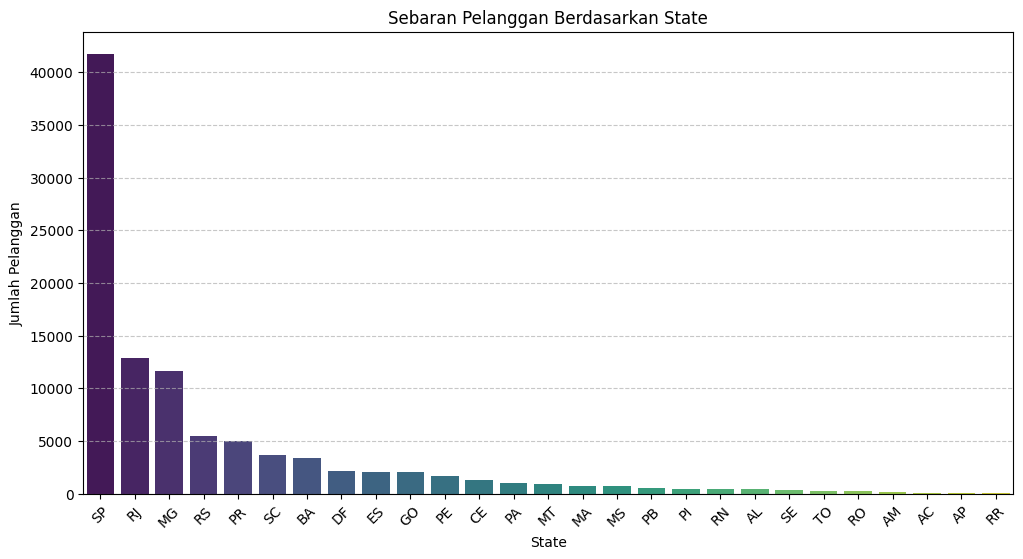

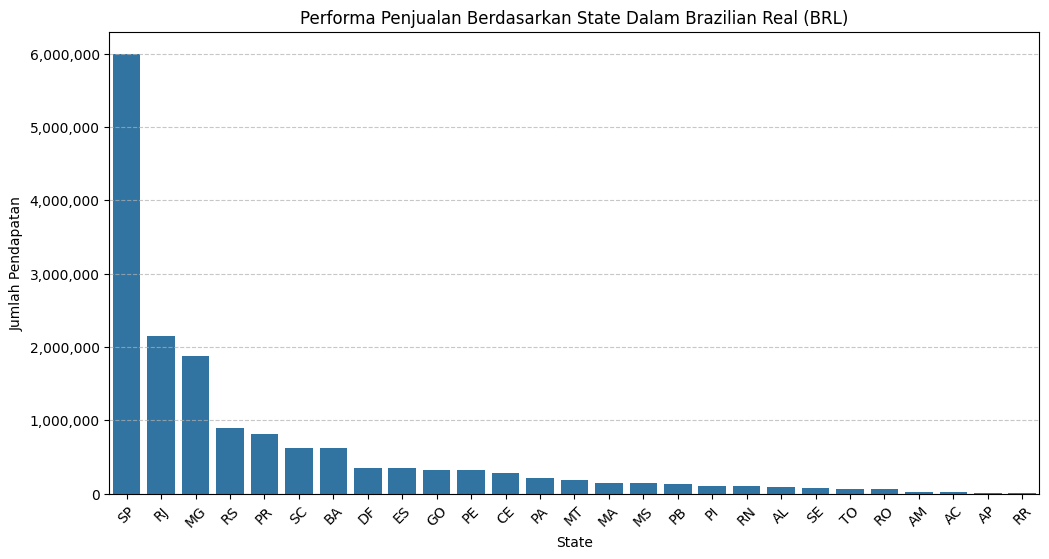

E:\Temp\ipykernel_18816\556068925.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_per_city.index, y=customer_per_city.values, palette="coolwarm")


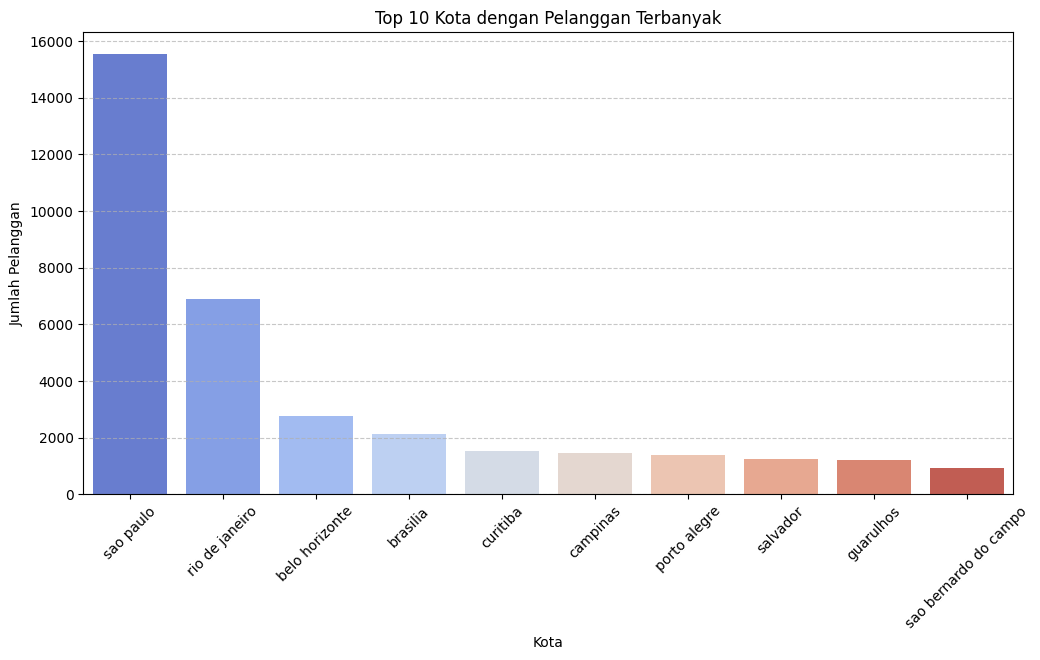

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_per_state.index, y=customer_per_state.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Sebaran Pelanggan Berdasarkan State')
plt.xlabel('State')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=customer_per_state.index, y=revenue_per_state.values)
plt.xticks(rotation=45)
plt.title('Performa Penjualan Berdasarkan State Dalam Brazilian Real (BRL)')
plt.xlabel('State')
plt.ylabel('Jumlah Pendapatan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtc.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=customer_per_city.index, y=customer_per_city.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title('Top 10 Kota dengan Pelanggan Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**<br>
- Pendapatan terbanyak berasal dari State of Sao Paulo, dengan total pendapatan 5.997.042.04 BRL
- State dengan pelanggan terbanyak adalahState of São Paulo, dengan total 41746 pengguna
- Kota dengan pelanggan terbanyak adalah Kota São Paulo, dengan total 15540 pengguna

## **Conclusion dari Analisis Data E-Commerce**

1. **Performa Penjualan & Revenue Perusahaan**
    - Bulan November 2017 mencatat jumlah penjualan tertinggi, yaitu 7288 penjualan. Ini menunjukkan adanya lonjakan permintaan, kemungkinan akibat promosi atau event tertentu
    - Sebaliknya, bulan September dan Desember 2016 memiliki penjualan terendah, hanya 1 transaksi, yang bisa mengindikasikan bahwa platform ini baru mulai beroperasi saat itu
    - Pendapatan tertinggi juga terjadi pada bulan November 2017, dengan total pendapatan sebesar 1.153.393,22 BRL, yang sejalan dengan tingginya jumlah transaksi pada bulan tersebut
    - Produk dalam kategori "furniture decor" adalah yang paling banyak terjual, yang bisa menunjukkan bahwa pelanggan e-commerce ini lebih cenderung membeli produk dekorasi rumah dibanding kategori lainnya

2. **Kepuasan Pelanggan & Review Produk**
    - Sebanyak 57.328 pengguna memberikan rating 5, yang berarti mayoritas pelanggan merasa puas dengan pengalaman belanja mereka
    - Rata-rata rating selama satu tahun cukup stabil di angka sekitar 4.5, menunjukkan bahwa kualitas layanan dan produk secara umum cukup baik

3. **Demografi Pelanggan & Wilayah Penjualan**
    - Pendapatan terbanyak berasal dari State of São Paulo, dengan total pendapatan sebesar 5.997.042,04 BRL, menjadikannya wilayah dengan kontribusi terbesar terhadap revenue perusahaan
    - State of São Paulo juga memiliki jumlah pelanggan terbanyak, dengan 41.746 pengguna
    - Kota dengan pelanggan terbanyak adalah São Paulo, dengan 15.540 pengguna, yang menegaskan bahwa pusat aktivitas e-commerce ini berada di kota besar tersebut

## **Kesimpulan Akhir & Rekomendasi Bisnis**
- **Optimalisasi Penjualan di Bulan November**
    - Mengingat bulan November memiliki penjualan dan pendapatan tertinggi, perusahaan bisa mengulang strategi promosi atau campaign yang sukses di bulan tersebut untuk meningkatkan penjualan pada bulan lainnya
    
- **Fokus pada Produk yang Laris**
    - Karena kategori "furniture decor" paling laris, strategi pemasaran bisa difokuskan lebih banyak pada kategori ini untuk meningkatkan pendapatan lebih lanjut

- **Menjaga Kepuasan Pelanggan**
    - Dengan rating rata-rata stabil di 4.5, perusahaan perlu tetap mempertahankan layanan yang baik, kualitas produk yang tinggi, serta pengiriman yang tepat waktu untuk menjaga kepuasan pelanggan

- **Memanfaatkan Wilayah dengan Permintaan Tinggi**
    - State dan Kota São Paulo merupakan state dengan jumlah palanggan terbanyak, sehingga perusahaan bisa mempertimbangkan strategi pengiriman lebih cepat, gudang lokal, atau penawaran eksklusif bagi pelanggan di wilayah tersebut untuk meningkatkan loyalitas pelanggan